In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
df = pd.read_excel("INPUT SET 3.xlsx")

In [21]:
# splitting the remaining data in training data and validation data. 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, shuffle = False)

In [22]:
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

In [23]:
# Scaling the data using MinMax Scaler.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.drop(["Y"],axis=1).values)
Y_train = scaler.fit_transform(df_train["Y"].values.reshape(-1,1))
X_test = scaler.fit_transform(df_test.drop(["Y"],axis=1).values)
Y_test = scaler.fit_transform(df_test["Y"].values.reshape(-1,1))

In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(940, 4)
(940, 1)
(404, 4)
(404, 1)


In [25]:
# function to denormalise the predicted values.
def denormalize(df,norm_data):
    df = df["Y"].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    
    return new

In [26]:
# variables required for model creation.
x_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)
W = tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [27]:
# output equation of linear regression model i.e. y_predicted = X_data.W + b
y_predicted = tf.add(tf.matmul(x_data, W), b)

In [28]:
# loss function = MSE (Mean Square Error)
cost = tf.reduce_mean(tf.square(y_predicted-y_target))

In [29]:
# Using Gradient Descent as the optimization algorithm.
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [30]:
train_loss = []
test_loss = [] 
batch_size =  100

In [31]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Loop for training the linear regression model.

for i in range(100):
        
    train_indices = np.random.choice(len(X_train), batch_size, replace=False)
    x = X_train[train_indices]
    y = Y_train[train_indices]
        
    for j in range(x.shape[0]):
        
        sess.run([cost,train],feed_dict={x_data:x[j,:].reshape(1,4), y_target:y[j].reshape(1,1)})
            
    train_loss.append(sess.run(cost, feed_dict={x_data:X_train,y_target:Y_train}))
    test_loss.append(sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))
    print('Epoch :',i,'Training Cost :',train_loss[i])
    print(sess.run(W).reshape(1,4))
        
# end of for loop for training the model. 

print('Test Data Cost :',sess.run(cost, feed_dict={x_data:X_test,y_target:Y_test}))

Epoch : 0 Training Cost : 0.056616783
[[-1.3882346   0.5872377   0.29386765  0.19345562]]
Epoch : 1 Training Cost : 0.048264742
[[-1.3222642   0.5972722   0.28781483  0.20673464]]
Epoch : 2 Training Cost : 0.04692675
[[-1.2980968   0.5917897   0.27928364  0.21967363]]
Epoch : 3 Training Cost : 0.04325741
[[-1.2326505   0.5847476   0.26219425  0.21971755]]
Epoch : 4 Training Cost : 0.04058615
[[-1.1884817   0.56641847  0.2459495   0.22480921]]
Epoch : 5 Training Cost : 0.038325816
[[-1.1446626   0.55424327  0.23395714  0.228877  ]]
Epoch : 6 Training Cost : 0.03588474
[[-1.0939846   0.5392145   0.22348166  0.23067147]]
Epoch : 7 Training Cost : 0.035260074
[[-1.0515192   0.559897    0.23723876  0.25319788]]
Epoch : 8 Training Cost : 0.032655746
[[-1.0182167   0.54101413  0.22381057  0.26787367]]
Epoch : 9 Training Cost : 0.032339077
[[-0.9916515   0.530846    0.2154533   0.28276682]]
Epoch : 10 Training Cost : 0.0297844
[[-0.955858    0.5155014   0.1933997   0.26625985]]
Epoch : 11 Trai

Epoch : 92 Training Cost : 0.011044436
[[-0.12764767  0.06241873  0.04770525  0.53934824]]
Epoch : 93 Training Cost : 0.010984913
[[-0.12772787  0.06257802  0.05638681  0.5465332 ]]
Epoch : 94 Training Cost : 0.010987173
[[-0.12644956  0.05880124  0.05670607  0.53871   ]]
Epoch : 95 Training Cost : 0.011399728
[[-0.1256018   0.0602897   0.06759732  0.55405384]]
Epoch : 96 Training Cost : 0.011608264
[[-0.12751266  0.05709736  0.07644977  0.5730806 ]]
Epoch : 97 Training Cost : 0.010954181
[[-0.12762518  0.05048294  0.07163164  0.5625607 ]]
Epoch : 98 Training Cost : 0.010947175
[[-0.12898554  0.05027809  0.07350767  0.5672424 ]]
Epoch : 99 Training Cost : 0.010956006
[[-0.12677792  0.05340226  0.07344276  0.5671735 ]]
Test Data Cost : 0.013909763


In [32]:
# stores the predicted value for test data using trained linear regression model.
pred = sess.run(y_predicted, feed_dict={x_data:X_test}) # output comes between 0 to 1.

In [33]:
# denormalizing our predicted value.
y_test = denormalize(df_test, Y_test)
pred = denormalize(df_test, pred)

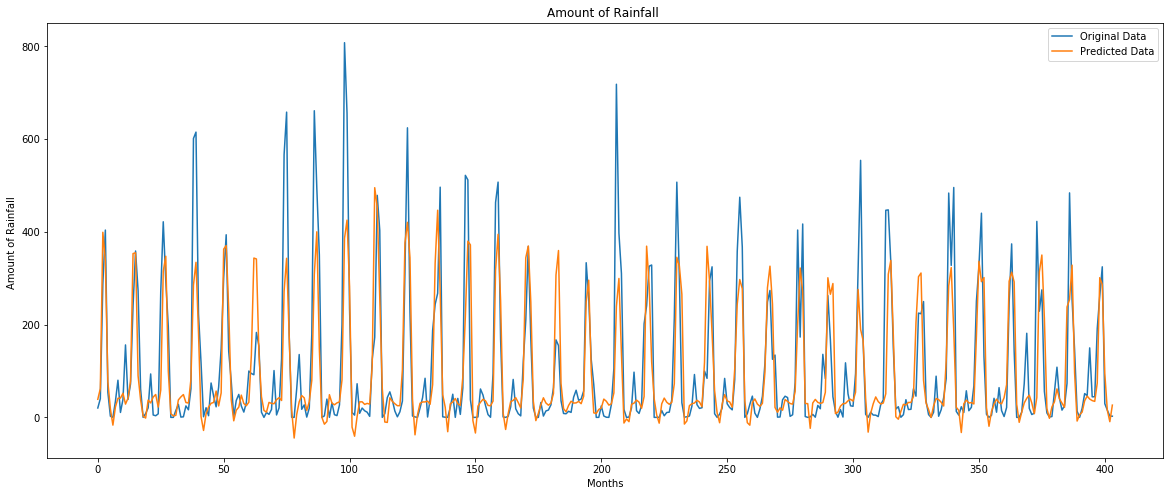

In [34]:
# plot showing difference between actual test data and predicted test data
plt.figure(figsize=[20,8])
plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

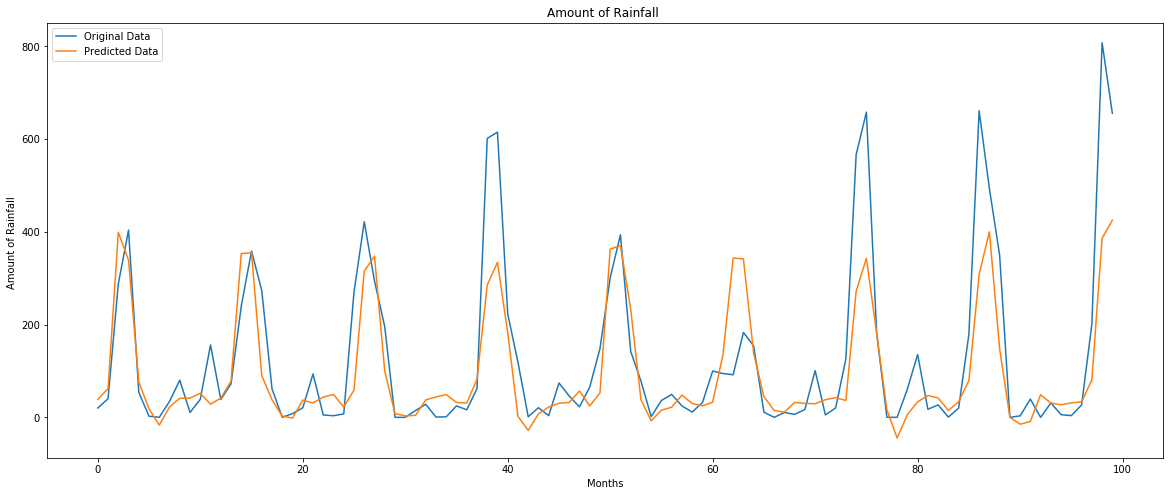

In [35]:
# plot showing difference between actual test data and predicted test data for first 100 samples.
plt.figure(figsize=[20,8])
plt.plot(range(100),y_test[:100],label="Original Data")
plt.plot(range(100),pred[:100],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel('Amount of Rainfall ')
plt.xlabel('Months')
plt.title('Amount of Rainfall ')
plt.show()

In [36]:
print("MAE : ", np.mean(abs(y_test-pred)))

MAE :  56.09023341616191


In [37]:
print("RMSE : ", np.sqrt(np.mean(np.square(y_test-pred))))

RMSE :  95.27165687852812
